In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Feb 28 12:37:03 2021

In [ ]:
@author: Ganesh
"""

In [1]:
import os
import numpy as np
import pandas as pd
from pandas import set_option
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
#import graphviz

Import the dataset

In [2]:
df = pd.read_csv("D:/datatrained_project/main_projects/hr_attrition_analysis/WA_Fn-UseC_-HR-Employee-Attrition.csv")

Analyze Data<br>
Descriptive Statistics

Dimensions of the dataset, e.g. the number of rows and columns.<br>
shape

In [3]:
print("\n Rows and Coloums in Data set",df.shape)
# types of dataset features
set_option('display.max_rows', 50)
print(df.dtypes)


 Rows and Coloums in Data set (1470, 35)
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLe

Data Preprocessing

take a peek at the first 20 rows of the data.<br>
head

In [4]:
set_option('display.width', 10)
print(df.head(20))

    Age  \
0    41   
1    49   
2    37   
3    33   
4    27   
5    32   
6    59   
7    30   
8    38   
9    36   
10   35   
11   29   
12   31   
13   34   
14   28   
15   29   
16   32   
17   22   
18   53   
19   38   

   Attrition  \
0        Yes   
1         No   
2        Yes   
3         No   
4         No   
5         No   
6         No   
7         No   
8         No   
9         No   
10        No   
11        No   
12        No   
13        No   
14       Yes   
15        No   
16        No   
17        No   
18        No   
19        No   

       BusinessTravel  \
0       Travel_Rarely   
1   Travel_Frequently   
2       Travel_Rarely   
3   Travel_Frequently   
4       Travel_Rarely   
5   Travel_Frequently   
6       Travel_Rarely   
7       Travel_Rarely   
8   Travel_Frequently   
9       Travel_Rarely   
10      Travel_Rarely   
11      Travel_Rarely   
12      Travel_Rarely   
13      Travel_Rarely   
14      Travel_Rarely   
15      Travel_Rarely   
16    

summarize the distribution of each attribute.<br>
descriptions, change precision to 3 places

In [5]:
set_option('precision', 3)
print(df.describe())

            Age  \
count  1470.000   
mean     36.924   
std       9.135   
min      18.000   
25%      30.000   
50%      36.000   
75%      43.000   
max      60.000   

       DailyRate  \
count   1470.000   
mean     802.486   
std      403.509   
min      102.000   
25%      465.000   
50%      802.000   
75%     1157.000   
max     1499.000   

       DistanceFromHome  \
count          1470.000   
mean              9.193   
std               8.107   
min               1.000   
25%               2.000   
50%               7.000   
75%              14.000   
max              29.000   

       Education  \
count   1470.000   
mean       2.913   
std        1.024   
min        1.000   
25%        2.000   
50%        3.000   
75%        4.000   
max        5.000   

       EmployeeCount  \
count         1470.0   
mean             1.0   
std              0.0   
min              1.0   
25%              1.0   
50%              1.0   
75%              1.0   
max              1.0   

     

breakdown of class values.<br>
class distribution

In [6]:
print(df.groupby('Attrition').size())

Attrition
No     1233
Yes     237
dtype: int64


data set is imbalance so we will use upsampling of the undersampled data to avoid bias towards hiher sample class i.e. <br>
ttrition<br>
o     1233<br>
es     237

p-sample Minority Class<br>
p-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal.<br>
here are several heuristics for doing so, but the most common way is to simply resample with replacement.<br>
irst, we'll import the resampling module from Scikit-Learn:

odule for resamplingPython<br>
rom sklearn.utils import resample<br>
ext, we'll create a new DataFrame with an up-sampled minority class. Here are the steps:

irst, we'll separate observations from each class into different DataFrames.<br>
ext, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class.<br>
inally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.

Separate majority and minority classes<br>
owever, we're going to turn this into a binary classification problem.

Transform into binary classification

In [7]:
df['Attrition'] = [1 if b == 'Yes' else 0 for b in df.Attrition]
 
df['Attrition'].value_counts()
# Out[165]: 
#0    1233
#1     237

0    1233
1     237
Name: Attrition, dtype: int64

e're going to label each observation as 1 (positive class) if the scale is balanced or 0 (negative class) if the scale is not balanced:

In [8]:
df_majority = df[df.Attrition == 0]
df_minority = df[df.Attrition == 1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1233,    # to match majority class
                                 random_state=50) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Attrition.value_counts()
df1 = df_upsampled

odule for resamplingPython<br>
rom sklearn.utils import resample

In [9]:
nan_in_df = df1.isnull().values.sum()

Print the dataframe for NAN

In [10]:
print("Nan value in df",nan_in_df)

Nan value in df 0


In [11]:
print(df1['Attrition'].isnull().values.sum())

0


Convert Categorical variable into onehotencoder/dummy variables

In [12]:
df1['BusinessTravel'] = pd.get_dummies(df1['BusinessTravel'])
df1['Department'] = pd.get_dummies(df1['Department'])
df1['EducationField'] = pd.get_dummies(df1['EducationField'])
df1['Gender'] = pd.get_dummies(df1['Gender'])
df1['JobRole'] = pd.get_dummies(df1['JobRole'])
df1['MaritalStatus'] = pd.get_dummies(df1['MaritalStatus'])
df1['OverTime'] = pd.get_dummies(df1['OverTime'])
df1['Over18'] = pd.get_dummies(df1['Over18'])

f1.reset_index(drop=True,inplace=True)

Split the dataset into train and test sets

In [13]:
Y=df1.iloc[:,1] 
X=df1.drop(['Attrition'],axis = 1)
print("X", X)
print("Y", Y)

X       Age  \
1      49   
3      33   
4      27   
5      32   
6      59   
...   ...   
479    24   
1332   29   
504    45   
1313   29   
102    20   

      BusinessTravel  \
1                  0   
3                  0   
4                  0   
5                  0   
6                  0   
...              ...   
479                0   
1332               0   
504                0   
1313               0   
102                0   

      DailyRate  \
1           279   
3          1392   
4           591   
5          1005   
6          1324   
...         ...   
479        1287   
1332        459   
504         306   
1313        350   
102         871   

      Department  \
1              0   
3              0   
4              0   
5              0   
6              0   
...          ...   
479            0   
1332           0   
504            0   
1313           1   
102            0   

      DistanceFromHome  \
1                    8   
3                    3   
4   

In [14]:
array=X.values
X=array[:,:]
array1=Y.values
Y=array[:,1]

In [15]:
validation_size = 0.20
seed = 10
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size, random_state=seed)
#array=df1.values

Test options and evaluation metric

In [16]:
num_folds = 10
seed = 10
scoring = 'accuracy'

Spot-Check Algorithms

In [17]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [18]:
results = []
names = []

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.999492 (0.001523)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond

LDA: 0.915826 (0.019900)
KNN: 0.925968 (0.016190)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

SVM: 0.942194 (0.012860)


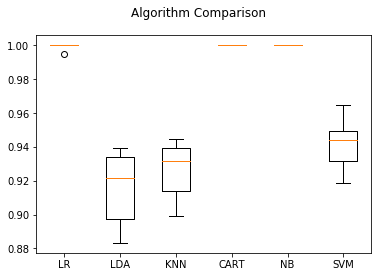

In [19]:
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Evaluate Algorithms: Standardize/Normalize data

to avoid data leakage when we transform the data. A good way to avoid leakage is to use pipelines<br>
that standardize the data and build the # model for each fold in the cross-validation test harness.<br>
That way we can get a fair estimation of how each model with standardized data might perform on unseen data.    

Standardize the dataset

In [ ]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []

In [ ]:
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Tuning LR

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
#k_values = np.array([0.05,0.1,0.2,0.3,0.4])
# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter spac
C = np.logspace(0,4,10)
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
model = LogisticRegression()

In [ ]:
grid = GridSearchCV(model, hyperparameters, cv=5, verbose=0)
grid_result = grid.fit(rescaledX, Y_train)
y_pred = grid_result.predict(X_validation)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

In [ ]:
for mean, stdev, param in zip(means, stds, params):
    print("mean, Standard Deviation and params %f (%f) with: %r" % (mean, stdev, param))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_pred, Y_validation)))
print(confusion_matrix(Y_validation, y_pred))
print(classification_report(Y_validation, y_pred))

Finalize model<br>
so Finalize the model by training it on the entire training dataset and make<br>
predictions for the hold-out validation dataset to confirm

prepare the model

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))